#### import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow import keras

#### Read the data and store it in a dataframe

In [ ]:
data = pd.read_csv('mnist.csv')

In [ ]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [ ]:
data.shape

(569, 785)

In [ ]:
X = data.drop(columns = ['label'])
y = data['label']

In [ ]:
X.shape

(569, 784)

In [ ]:
y.shape

(569,)

In [ ]:
X = X.values.reshape((len(X)),28,28,1)

In [ ]:
X.shape

(569, 28, 28, 1)

#### Normalize the data in X

In [ ]:
X=X/255

In [ ]:
X

array([[[[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]],

        ...,

        [[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]]],


       [[[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [

#### Display some of the images in X

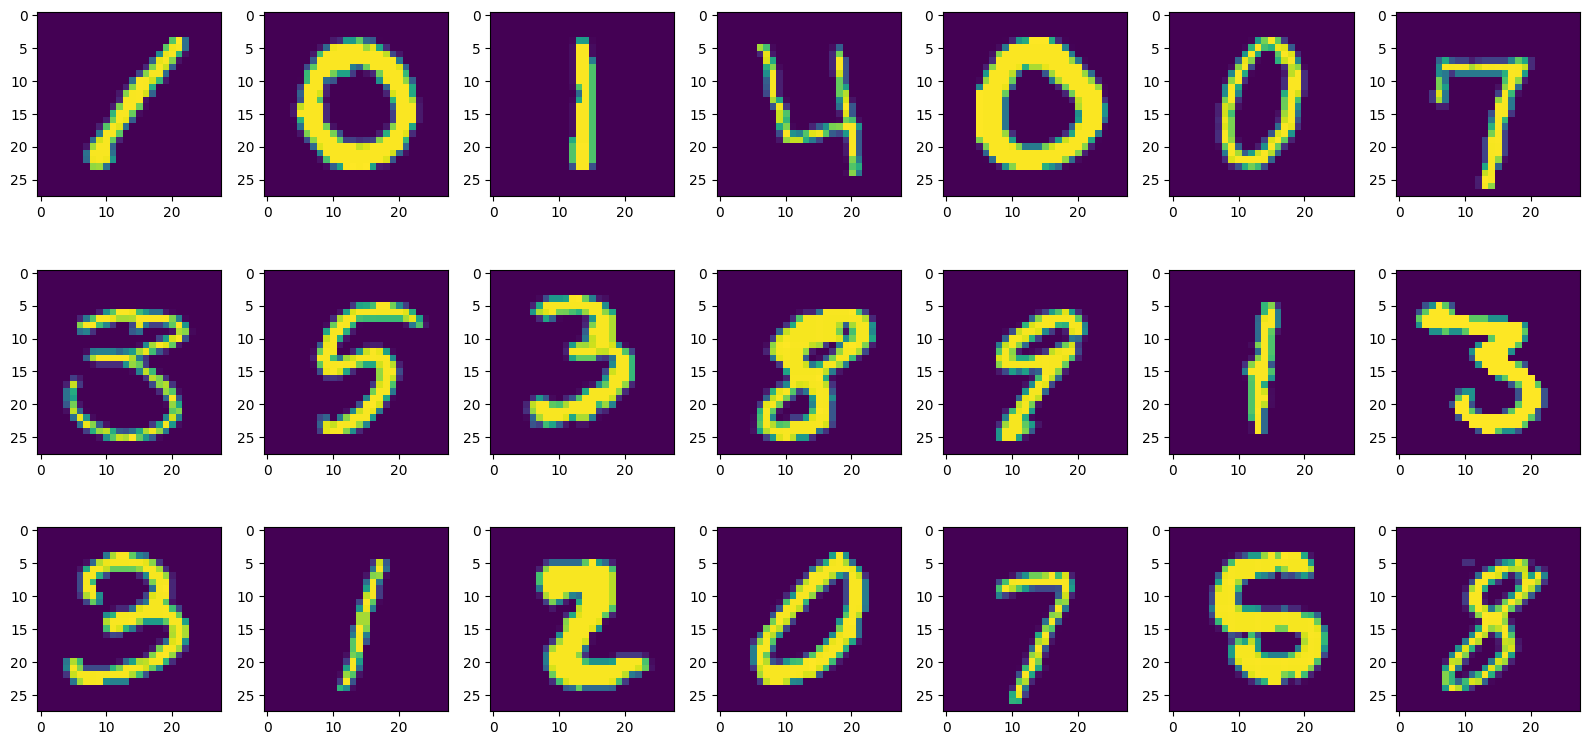

In [ ]:
plt.figure(figsize = (16,8))
for i in range(21):
    plt.subplot(3,7,i+1)
    plt.imshow(X[i])
plt.tight_layout()

#### Spliting the dataset into training and tesing set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [ ]:
X_train.shape

(455, 28, 28, 1)

In [ ]:
X_test.shape

(114, 28, 28, 1)

#### Create the ANN model

In [ ]:
model = keras.Sequential([
                  keras.layers.Flatten(input_shape = (28,28)),
                  keras.layers.Dense(100, activation="relu"),
                  keras.layers.Dense(10,activation="sigmoid")
])

#### Compile the model

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


#### Training the model

In [ ]:
model.fit(X_train,y_train, epochs = 5, validation_split=0.05, batch_size = 20)

Epoch 1/5
22/22 [==============================] - 1s 15ms/step - loss: 1.8618 - accuracy: 0.4074 - val_loss: 1.4096 - val_accuracy: 0.5217
Epoch 2/5
22/22 [==============================] - 0s 4ms/step - loss: 1.0477 - accuracy: 0.7778 - val_loss: 0.8963 - val_accuracy: 0.6957
Epoch 3/5
22/22 [==============================] - 0s 6ms/step - loss: 0.6692 - accuracy: 0.8495 - val_loss: 0.6918 - val_accuracy: 0.8261
Epoch 4/5
22/22 [==============================] - 0s 5ms/step - loss: 0.4923 - accuracy: 0.9005 - val_loss: 0.4924 - val_accuracy: 0.8696
Epoch 5/5
22/22 [==============================] - 0s 5ms/step - loss: 0.3717 - accuracy: 0.9282 - val_loss: 0.4449 - val_accuracy: 0.8696


#### Evaluate

In [ ]:
model.evaluate(X_train, y_train)

15/15 [==============================] - 0s 3ms/step - loss: 0.3051 - accuracy: 0.9516


[0.30512672662734985, 0.9516483545303345]

#### Predicting the values using X_test

In [ ]:
prediction = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
prediction

array([[0.9991328 , 0.00509592, 0.38673055, ..., 0.22690137, 0.06641571,
        0.35023314],
       [0.54998964, 0.0232816 , 0.9651929 , ..., 0.12291007, 0.16212109,
        0.32406273],
       [0.01731847, 0.2165402 , 0.0382993 , ..., 0.6922595 , 0.5254762 ,
        0.992898  ],
       ...,
       [0.14925289, 0.80315614, 0.8210013 , ..., 0.2305724 , 0.69469583,
        0.5839702 ],
       [0.13573077, 0.01075127, 0.46635783, ..., 0.55979365, 0.54858994,
        0.7751234 ],
       [0.08700489, 0.96558195, 0.3411766 , ..., 0.14216548, 0.3573801 ,
        0.17336318]], dtype=float32)

#### argmax() returns the index position of the largest value in the list

In [ ]:
np.argmax(prediction[0])

0

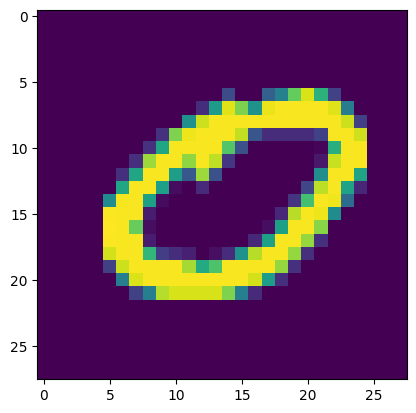

In [ ]:
plt.imshow(X_test[0])

In [ ]:
predicted_values = [np.argmax(i) for i in prediction]

#### plot the predicted value against actual value

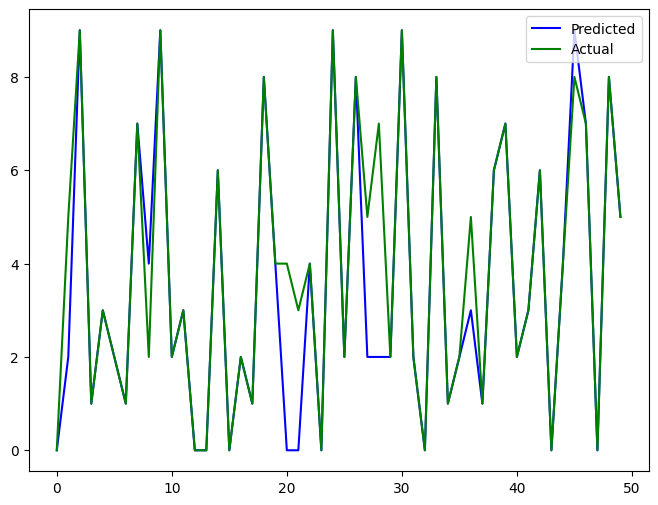

In [ ]:
c = range(len(predicted_values))
plt.figure(figsize = (8,6))
plt.plot(c[:50], predicted_values[:50], color = 'blue')
plt.plot(c[:50], y_test[:50], color = 'green')
plt.legend(['Predicted', 'Actual'])
plt.show()

#### Plot the confusion matrix

Text(70.72222222222221, 0.5, 'Actual Values')

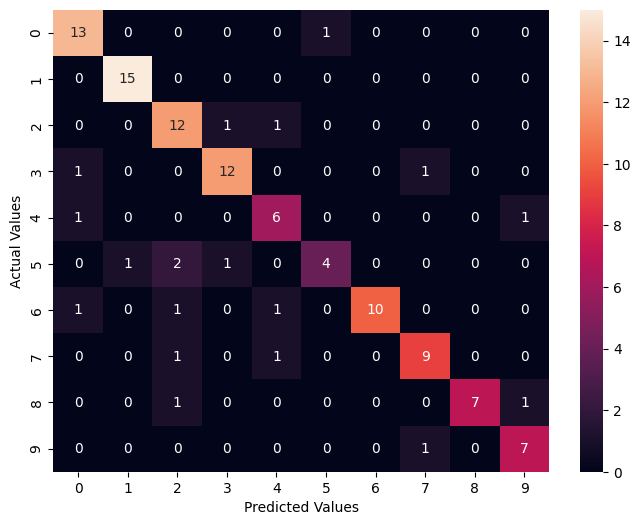

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test,predicted_values), annot = True, fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')